In [1]:
#About Dataset
# ID - ID of the patient
# A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
# age - Age of the patient in years
# gender - Gender of the patient
# ethnicity - Ethnicity of the patient
# jaundice - Whether the patient had jaundice at the time of birth
# autism - Whether an immediate family member has been diagnosed with autism
# # contry_of_res - Country of residence of the patient
# used_app_before - Whether the patient has undergone a screening test before
# result - Score for AQ1-10 screening test
# age_desc - Age of the patient
# relation - Relation of patient who completed the test
# Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [3]:
#creating dataframe
df = pd.read_csv(r"C:\Users\Akanksha\Downloads\Autism_Prediction\train.csv")
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [4]:
df.shape

(800, 22)

In [5]:
df.head(6)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,...,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0


In [6]:
#displaying all the rows and columns of dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#None means we just want to see the values 

In [7]:
df.head(6)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,1,31.527964,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0


In [8]:
df.tail(6)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
794,795,0,1,0,0,1,0,0,1,0,0,14.602387,m,?,no,no,India,no,9.592719,18 and more,Self,0
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [10]:
#checking which rows and columns contain null values 
df.isnull()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [12]:
#calculating percentage of null values present in dataframe
df.isnull().sum() / df.shape[0]*100

ID                 0.0
A1_Score           0.0
A2_Score           0.0
A3_Score           0.0
A4_Score           0.0
A5_Score           0.0
A6_Score           0.0
A7_Score           0.0
A8_Score           0.0
A9_Score           0.0
A10_Score          0.0
age                0.0
gender             0.0
ethnicity          0.0
jaundice           0.0
austim             0.0
contry_of_res      0.0
used_app_before    0.0
result             0.0
age_desc           0.0
relation           0.0
Class/ASD          0.0
dtype: float64

In [13]:
sum(df.duplicated())

0

In [14]:
#distplot accepts only numeric parameters for creating the plots
#therefore extracting the numeric columns
df.select_dtypes(include=['int64','float64']).columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'result', 'Class/ASD'],
      dtype='object')

C:\MinGW\python 37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A1_Score', ylabel='Density'>

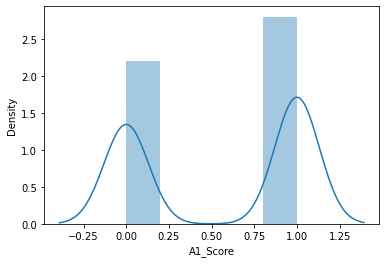

In [15]:
#cross checking whether data is cleaned appropriately or not
#creating distribution plot for the same reason
#distplot produces histogram only
sns.distplot(df['A1_Score'])

In [16]:
#plotting data distribution for each feature
num_var = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'result', 'Class/ASD']

C:\MinGW\python 37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\MinGW\python 37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\MinGW\python 37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

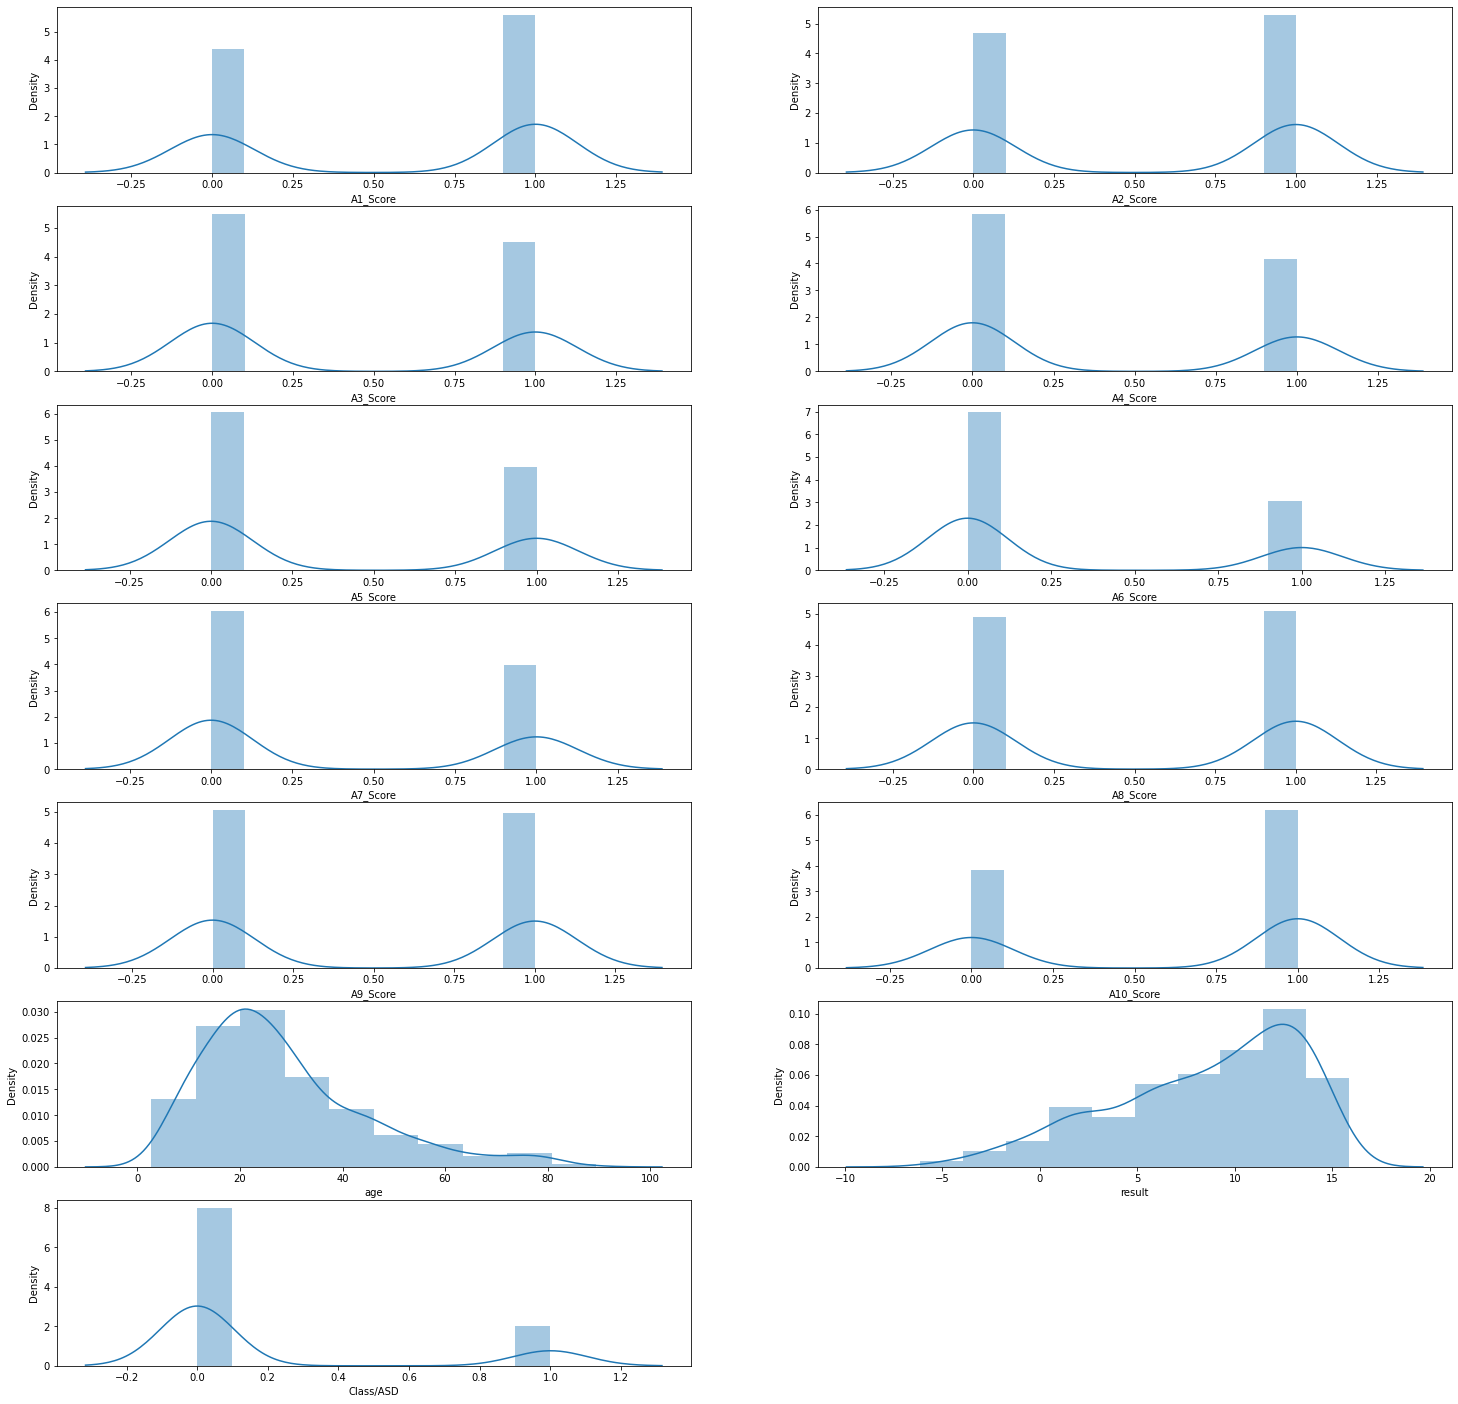

In [17]:
plt.figure(figsize=(25,25))
for i, var in enumerate(num_var):
    #enumerate gives an item from list and its index
    plt.subplot(7,2,i+1)
    #7 rows, 2 columns because we have 14 features.
    #i+1 stands for index
    sns.distplot(df[var], bins=10)
    

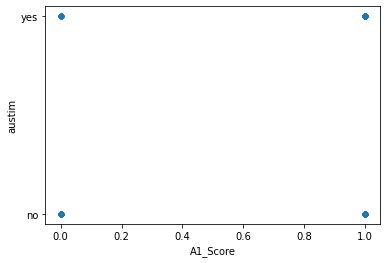

In [18]:
df.plot(kind='scatter', x='A1_Score' ,y='austim')
plt.show()

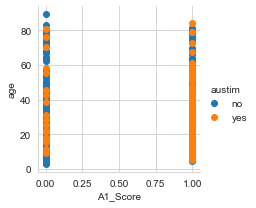

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue='austim') \
    .map(plt.scatter,"A1_Score","age") \
    .add_legend();
plt.show();


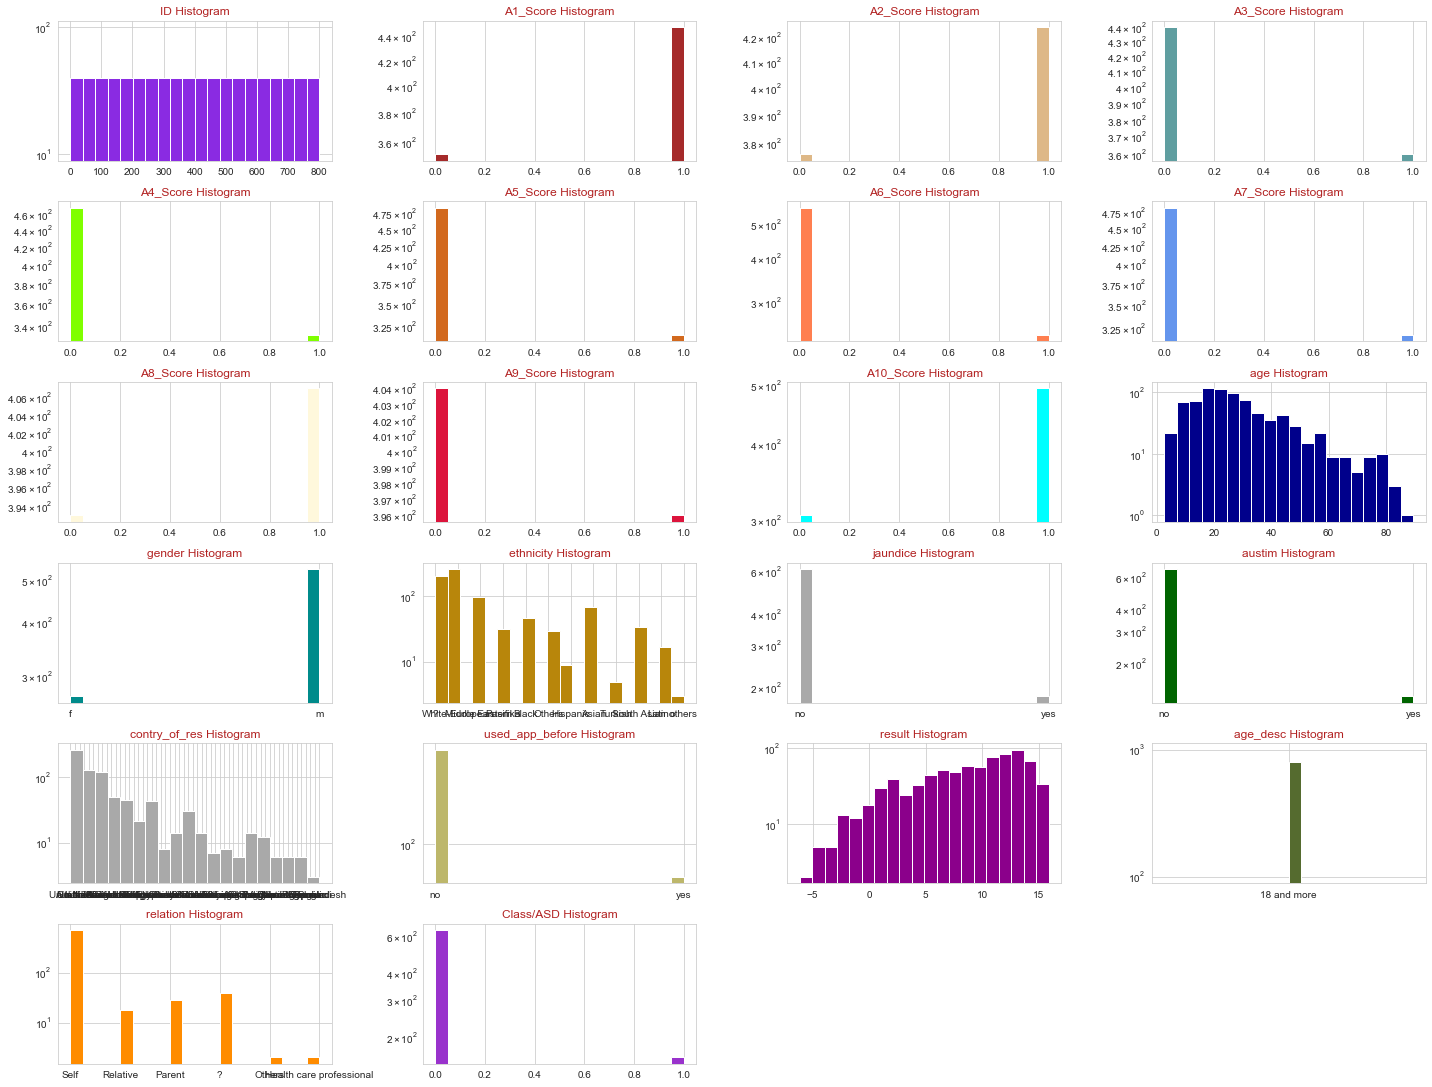

In [20]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

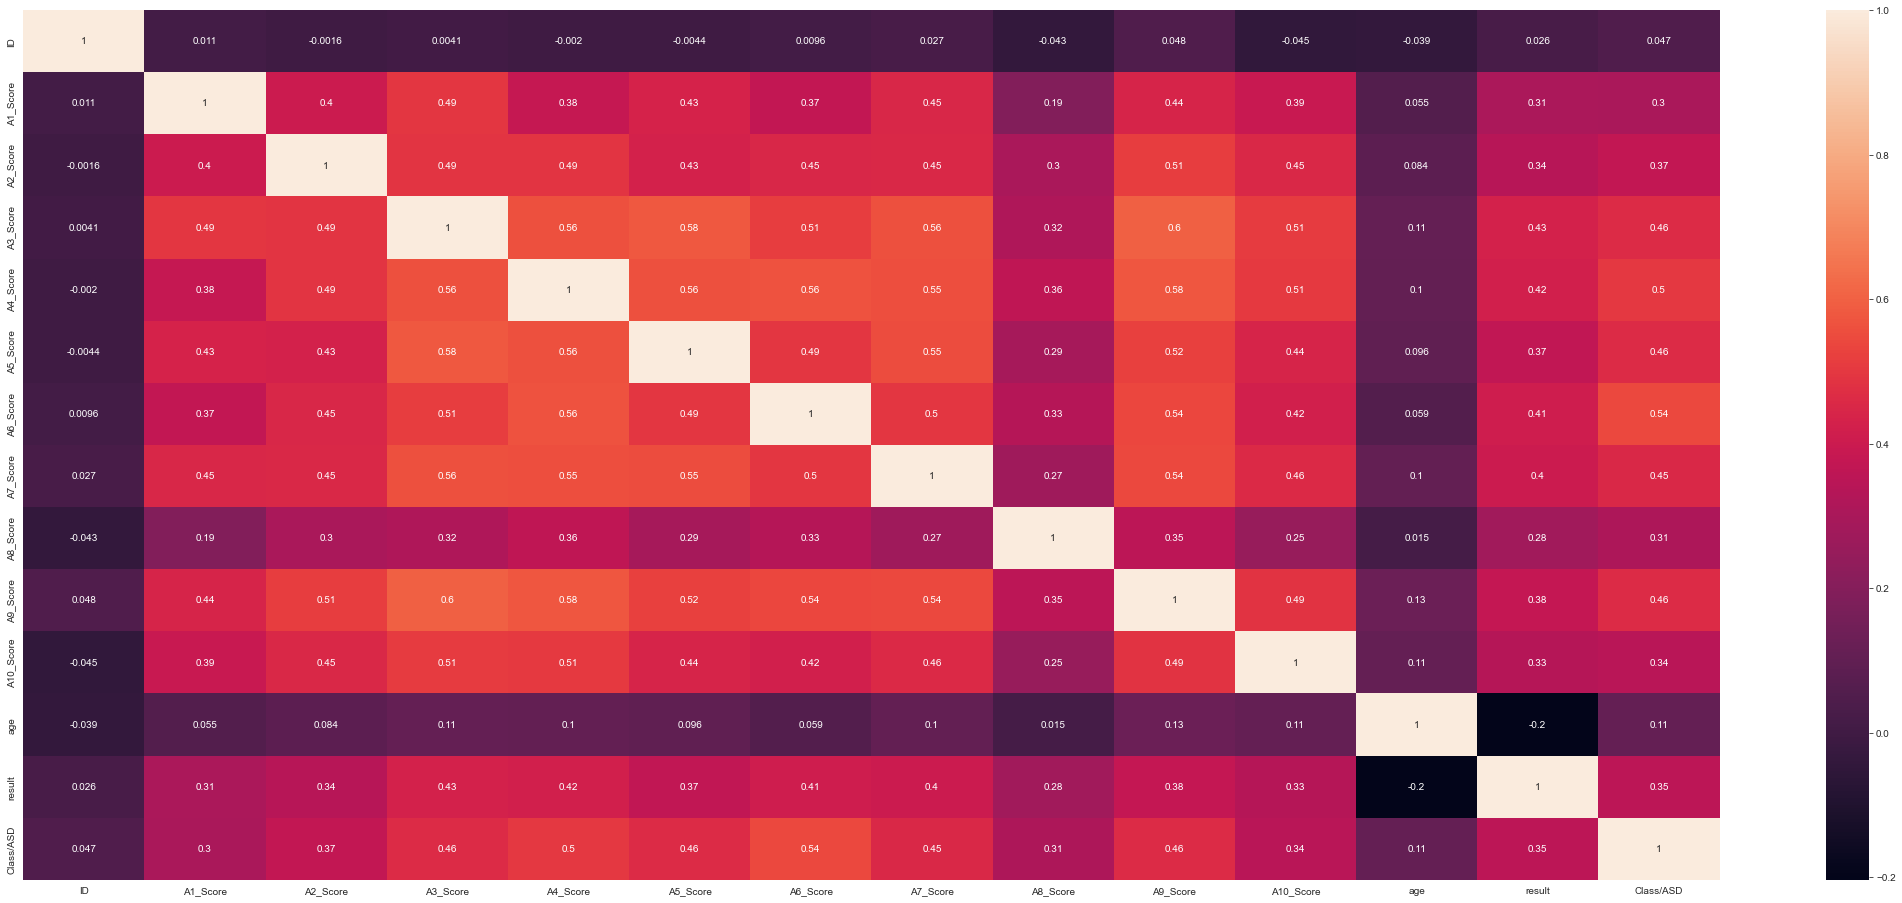

In [21]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [22]:
X = df['A1_Score'].values
y = df['A2_Score'].values


In [23]:
print(X)

[1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0
 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1
 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0
 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1
 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 1 

In [24]:
X = np.reshape(X, (-1, 2))

In [25]:
print(X)

[[1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]

In [26]:
print(y)

[0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1
 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1
 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1
 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 1 1 0 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify=y, random_state=2)

ValueError: Found input variables with inconsistent numbers of samples: [400, 800]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)